<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/Crime_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset sobre taxa de ocorrência de crimes como roubo, furto e relacionados
*Os dados foram extraídos do sistema de Registro Digital de Ocorrências (R.D.O.) disponível no site www.ssp.sp.gov.br referente ao ano de 2016.*

*Importando as bibliotecas necessárias para tratamento, estatística e visualização de dados:*

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Carregando o arquivo:*

In [201]:
# Diretamente do GitHub:
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/Edited_CrimeRatesBrazil.csv'
data = pd.read_csv(url)

In [202]:
# Lendo o arquivo CSV que foi carregado na página:
# data = pd.read_csv('Edited_CrimeRatesBrazil.csv')

# Siglas e termos:

*DECAP = Departamento de Polícia Judiciária da Capital;
Seccionais = Subdivisões da DECAP, por unidade territorial;
Flag_status = status de registro;
CIRC = Circunscrição;
Rubrica = Natureza jurídica da ocorrência, tipo de crime.
Status:
  "Remarcado" ('R')
  "Cancelado" ('C')
  "Convertido em Diligência" ('D')
  "Realizada" ('F')
  "Não realizada" ('N')
  Disponível apenas para usuários internos e para audiências ('M')*

#Limpeza e Tratamento
Procurando nulos e removendo: NA - Not Available e NaN - Not a Number.
Podemos ver que 5 colunas retornaram True, ou seja, possuem pelo menos um valor (any) indisponível ou vazio (isnull).

In [203]:
print(data.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
FLAG_STATUS               False
RUBRICA                   False
DESDOBRAMENTO              True
CONDUTA                    True
LATITUDE                   True
LONGITUDE                  True
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO         False
FLAG_STATUS.1             False
Unnamed: 21                True
dtype: bool



Aqui podemos ver que:
- A coluna DESDOBRAMENTO tem apenas 5 valores;
- As colunas CONDUTA, LATITUDE e LONGITUDE estão quase completas;
- Unnamed: 21 está vazia;
- FLAG_STATUS.1 é uma repetição de FLAG_STATUS.

In [204]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  199 non-null    int64  
 1   ANO_BO                  199 non-null    int64  
 2   ID_DELEGACIA            199 non-null    int64  
 3   NOME_DEPARTAMENTO       199 non-null    object 
 4   NOME_SECCIONAL          199 non-null    object 
 5   DELEGACIA               199 non-null    object 
 6   NOME_DEPARTAMENTO_CIRC  199 non-null    object 
 7   NOME_SECCIONAL_CIRC     199 non-null    object 
 8   NOME_DELEGACIA_CIRC     199 non-null    object 
 9   ANO                     199 non-null    int64  
 10  MES                     199 non-null    int64  
 11  FLAG_STATUS             199 non-null    object 
 12  RUBRICA                 199 non-null    object 
 13  DESDOBRAMENTO           5 non-null      object 
 14  CONDUTA                 185 non-null    ob

Podemos então apagar as colunas DESDOBRAMENTO, Unnamed: 21 e FLAG_STATUS.1, por falta ou insuficiência de valores.

Com drop podemos excluir as colunas (axis=1 são colunas, axis=0 são linhas) sem utilidade, salvando em um novo dataframe (recebido pela variável data2) e depois salvando num outro arquivo csv (com to_csv):

In [205]:
data2 = data.drop('DESDOBRAMENTO', axis=1)
data2.to_csv('data_semDesdob.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto(art.155),TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000,C,NaN
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo(art.157),TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0,C,NaN
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,DrogasSemAutorizacaoOuEmDesacordo(art.33_caput),NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0,C,NaN
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo(art.157),CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15,C,NaN
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,LesaoCorporal(art.129),NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625,C,NaN


In [206]:
data2 = data2.drop('Unnamed: 21', axis=1)
data2.to_csv('data_semUnnamed.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto(art.155),TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000,C
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo(art.157),TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0,C
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,DrogasSemAutorizacaoOuEmDesacordo(art.33_caput),NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0,C
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo(art.157),CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15,C
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,LesaoCorporal(art.129),NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625,C


In [207]:
data2 = data2.drop('FLAG_STATUS.1', axis=1)
data2.to_csv('data_semFlag.1.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto(art.155),TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo(art.157),TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,DrogasSemAutorizacaoOuEmDesacordo(art.33_caput),NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo(art.157),CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,LesaoCorporal(art.129),NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625


Observamos também que a tabela Flag_status tem todos os valores iguais, 

In [208]:
data = data.drop('FLAG_STATUS', axis=1)
data.to_csv('data_semFlag2.csv', index= False)

Observamos que a coluna mais importante para o nosso estudo é a Rubrica, a qual traz a natureza do crime.

# Analisando os dados
Com describe, vemos que apesar de ser referente ao ano de 2016, há pelo menos uma ocorrência de 2017 (última linha -> max).

In [209]:
data2.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,LATITUDE,LONGITUDE,NUMERO_LOGRADOURO
count,1.990000e+02,199.000000,199.000000,199.0,199.000000,188.000000,188.000000,199.000000
mean,4.687784e+05,2016.020101,500213.251256,2016.0,6.658291,-23.574926,-46.113215,688.437186
std,5.535074e+05,0.140698,437009.554279,0.0,3.374566,0.079832,6.802924,1437.826725
min,3.600000e+01,2016.000000,10004.000000,2016.0,1.000000,-23.808308,-46.958875,0.000000
25%,3.555500e+03,2016.000000,25201.500000,2016.0,4.000000,-23.618337,-46.687784,37.500000
50%,1.442190e+05,2016.000000,900020.000000,2016.0,7.000000,-23.559011,-46.623184,248.000000
75%,8.584790e+05,2016.000000,900020.000000,2016.0,10.000000,-23.528155,-46.531476,549.000000
max,1.649798e+06,2017.000000,900020.000000,2016.0,12.000000,-23.281891,46.652035,13913.000000


In [210]:
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto(art.155),TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo(art.157),TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,DrogasSemAutorizacaoOuEmDesacordo(art.33_caput),NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo(art.157),CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,LesaoCorporal(art.129),NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625


#**Verificando coleções de crimes com a localidade**
pendencias:
mesmo crimes nomes diferentes


In [211]:
logradouro = data2["NUMERO_LOGRADOURO"]
delito = data2["RUBRICA"]


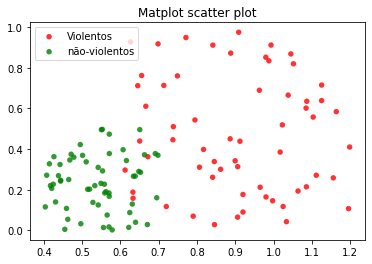

In [212]:
# CRIANDO GRUPOS PARA CADA CRIME
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
#g1 = ()
#g2 = ()

data = (g1, g2)
colors = ("red", "green")
groups = ("Violentos", "não-violentos")

# Criando plotagem
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

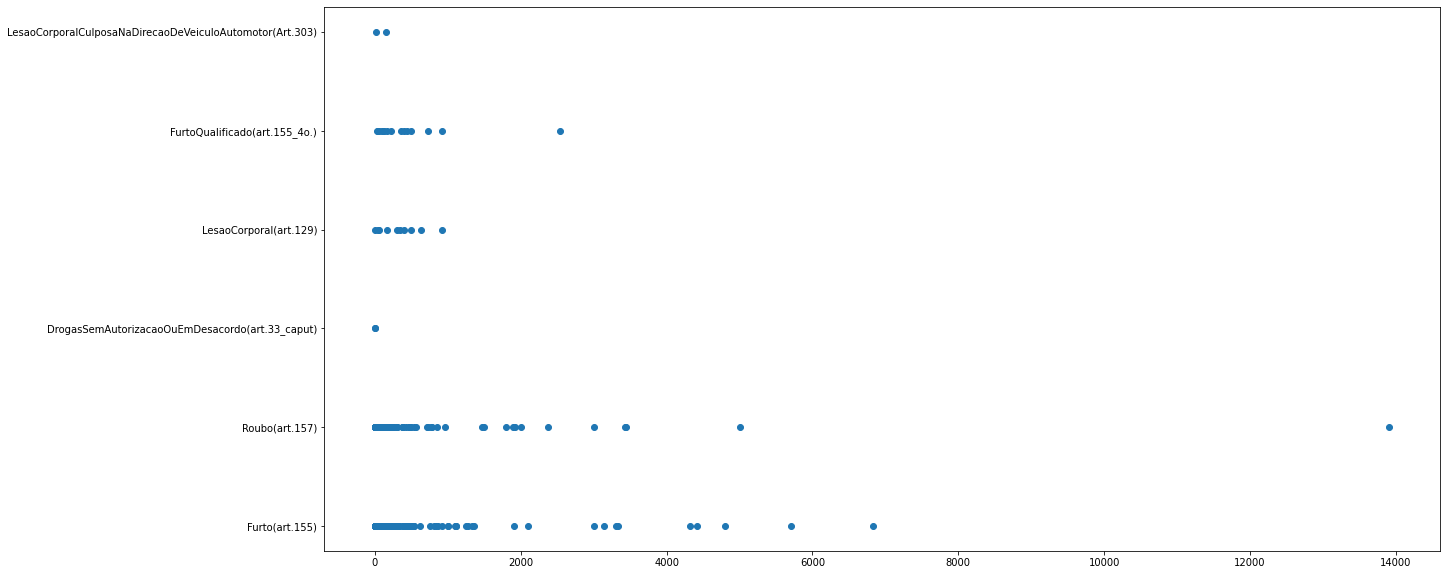

In [213]:
plt.figure(figsize=(20,10))
#plt.xticks(rotation=90)
plt.scatter(logradouro, delito)
plt.show()

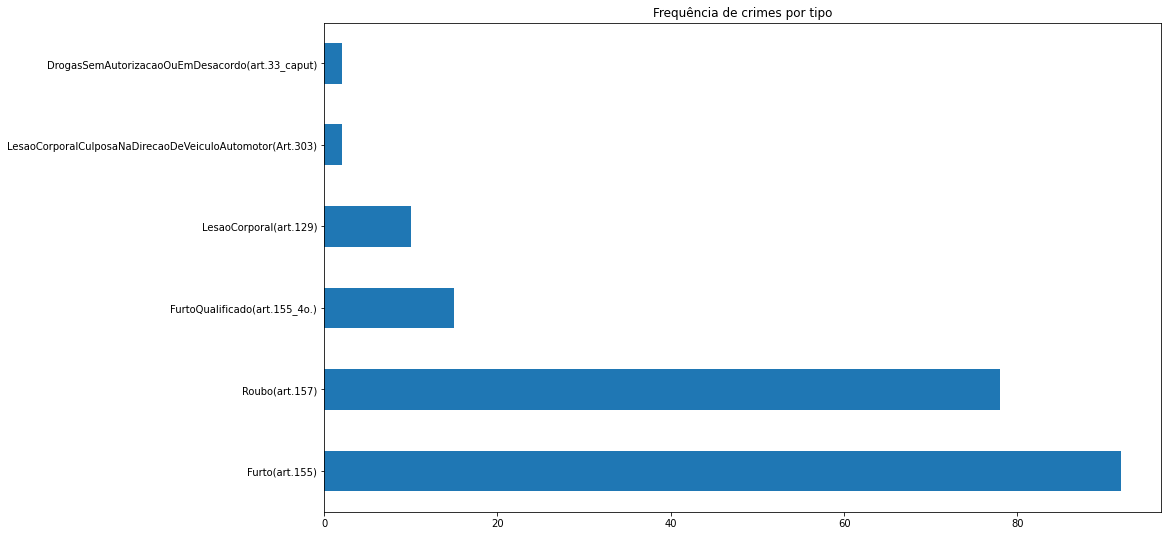

In [214]:
plt.figure(figsize=(15,9))
data2['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.show()

In [215]:
data2.describe(include='all')

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO
count,1.990000e+02,199.000000,199.000000,199,199,199,199,199,199,199.0,199.000000,199,199,185,188.000000,188.000000,199,199,199.000000
unique,NaN,NaN,NaN,7,22,59,2,17,103,NaN,NaN,1,6,13,NaN,NaN,20,191,NaN
top,NaN,NaN,NaN,DIPOL-DEPTODEINTELIGENCIA,DELEGACIAELETRONICA,DELEGACIAELETRONICA,DECAP,DEL.SEC.1CENTRO,01D.P.SE,NaN,NaN,C,Furto(art.155),TRANSEUNTE,NaN,NaN,S.PAULO,AVENIDAPAULISTA,NaN
freq,NaN,NaN,NaN,108,108,108,133,37,10,NaN,NaN,199,92,80,NaN,NaN,133,4,NaN
mean,4.687784e+05,2016.020101,500213.251256,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,6.658291,NaN,NaN,NaN,-23.574926,-46.113215,NaN,NaN,688.437186
std,5.535074e+05,0.140698,437009.554279,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.374566,NaN,NaN,NaN,0.079832,6.802924,NaN,NaN,1437.826725
min,3.600000e+01,2016.000000,10004.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,1.000000,NaN,NaN,NaN,-23.808308,-46.958875,NaN,NaN,0.000000
25%,3.555500e+03,2016.000000,25201.500000,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,4.000000,NaN,NaN,NaN,-23.618337,-46.687784,NaN,NaN,37.500000
50%,1.442190e+05,2016.000000,900020.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,7.000000,NaN,NaN,NaN,-23.559011,-46.623184,NaN,NaN,248.000000
75%,8.584790e+05,2016.000000,900020.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,10.000000,NaN,NaN,NaN,-23.528155,-46.531476,NaN,NaN,549.000000
